# Analyse and run models using AffectNet dataset

In this notebook we are going to build, test, analyze and compare the model with the previous versions. This is followed by improvements to the model and the data. We run this cycle a few times until we achieve realistic and nice results.

This model has been build in [this](https://github.com/BB8-2020/EmpathicRobot/tree/main/models/classification_model) file. 

If you have any quesentions about this notebook, send us a mail at maria.dukmak@student.hu.nl

In [1]:
import sys
# You need to change this path to your project path
sys.path.append('/Users/storm/OneDrive/Documenten/HU/Jaar_2/BB8/EmpathicRobot')
from conv_model import *
from models.functions import *
from models.classification_model.model_functions import *
from tensorflow.keras import Sequential

## Read data
As we have done before, our data is ready to use. In this section we will use **AffectNet** to train the model. This data has already been read, prepared and stored in [this](https://github.com/BB8-2020/EmpathicRobot/tree/main/data) file. For now, our data is in a pickel file that we will read as follows:

For simplicity, we set up the path to the data as follows, you can also set it to your own path.

In [2]:
os.chdir(os.getcwd() + '/data/')

We immediately split the data into train, test and validation set.

In [3]:
x_train, y_train, x_val, y_val, x_test, y_test = read_data('affectNet_processed')

As we see, the data consists of train set that contains 80% of the data. The validation and the test set are equal in size 20% and are used to subsequently test the model.

This data has already been cleaned and normalized so we don't have to do anything with the data anymore.

In [4]:
print(f"Train set: X_train shape:{x_train.shape} Y_train shape:{y_train.shape}")

print(f"Test set: X_test shape:{x_test.shape} Y_test shape:{y_test.shape}")

print(f"Validation set: X_val shape:{x_val.shape} Y_val shape:{y_val.shape}")

Train set: X_train shape:(15313, 48, 48, 3) Y_train shape:(15313, 7)
Test set: X_test shape:(1915, 48, 48, 3) Y_test shape:(1915, 7)
Validation set: X_val shape:(1915, 48, 48, 3) Y_val shape:(1915, 7)


## Models

In [5]:
# We create all the models that we got 
models = build_models(input_shape=(48, 48, 3), num_classes=7)

### Model version 1 

Now it is finally time to start working on the model. We are going to start with the following model:

In [6]:
model1 = Sequential(models[0]['layers'], name = models[0]['name'])

Let's check the summary out:

In [7]:
model1.summary()

Model: "Sequential_version_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 20, 12

Looks good, time to compile!

### Compile and train

To compile the model we use Adam optimaizer and binary crossentropy as los function. Let us now train the model.

In [8]:
compile_model(model1)

In [9]:
history = fit_model(model1, 64, 70, False, x_train, y_train, x_val, y_val, x_test)

Epoch 1/70
239/239 - 10s - loss: 0.2937 - accuracy: 0.5478 - val_loss: 0.3123 - val_accuracy: 0.5640
Epoch 2/70
239/239 - 5s - loss: 0.2504 - accuracy: 0.6089 - val_loss: 0.2925 - val_accuracy: 0.5337
Epoch 3/70
239/239 - 5s - loss: 0.2349 - accuracy: 0.6340 - val_loss: 0.2424 - val_accuracy: 0.6052
Epoch 4/70
239/239 - 5s - loss: 0.2196 - accuracy: 0.6589 - val_loss: 0.2314 - val_accuracy: 0.6324
Epoch 5/70
239/239 - 5s - loss: 0.2050 - accuracy: 0.6856 - val_loss: 0.2352 - val_accuracy: 0.6313
Epoch 6/70
239/239 - 5s - loss: 0.1880 - accuracy: 0.7136 - val_loss: 0.2327 - val_accuracy: 0.6329
Epoch 7/70
239/239 - 5s - loss: 0.1703 - accuracy: 0.7460 - val_loss: 0.2360 - val_accuracy: 0.6501
Epoch 8/70
239/239 - 5s - loss: 0.1480 - accuracy: 0.7885 - val_loss: 0.2488 - val_accuracy: 0.6470
Epoch 9/70
239/239 - 4s - loss: 0.1220 - accuracy: 0.8340 - val_loss: 0.2565 - val_accuracy: 0.6407
Epoch 10/70
239/239 - 4s - loss: 0.0965 - accuracy: 0.8822 - val_loss: 0.2750 - val_accuracy: 0.653

Now we're going to test our model using the test set for the model.

In [10]:
test_loss, test_acc = evaluate_model(model1, x_test, y_test,  64)

30/30 [==============================] - 0s 6ms/step - loss: 0.7131 - accuracy: 0.6428


In [11]:
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

Test loss: 0.7131
Test accuracy: 0.6428


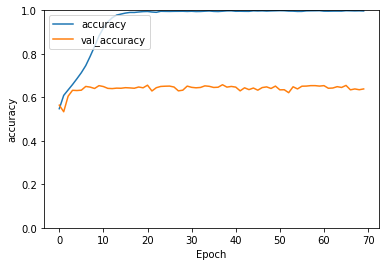

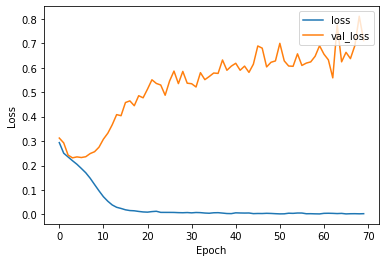

In [12]:
plot_acc_loss(history)

We see that this model is very overfitted. We will now try to train another model that may be less overfitted.

### Model version 2

Now we are going the same as above. So we are going to creat the model, complie it and fit it.

In [13]:
model2 = Sequential(models[1]['layers'], name = models[1]['name'])

In [14]:
model2.summary()

Model: "Sequential_version_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 46, 46, 64)        1792      
_________________________________________________________________
batch_normalization_3 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
batch_normalization_4 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 44, 44, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 42, 42, 64)        36928     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 40, 40, 64

Perfect! Lets compile 

### Compile and train

In [15]:
compile_model(model2)

In [16]:
# to do: set epoches to 100
history = fit_model(model2, 64, 70, False, x_train, y_train, x_val, y_val, x_test)

Epoch 1/70
239/239 - 9s - loss: 0.3131 - accuracy: 0.5096 - val_loss: 0.3790 - val_accuracy: 0.2580
Epoch 2/70
239/239 - 8s - loss: 0.2642 - accuracy: 0.5878 - val_loss: 0.3335 - val_accuracy: 0.4021
Epoch 3/70
239/239 - 7s - loss: 0.2452 - accuracy: 0.6151 - val_loss: 0.2467 - val_accuracy: 0.6110
Epoch 4/70
239/239 - 7s - loss: 0.2332 - accuracy: 0.6360 - val_loss: 0.2406 - val_accuracy: 0.6193
Epoch 5/70
239/239 - 7s - loss: 0.2222 - accuracy: 0.6552 - val_loss: 0.2343 - val_accuracy: 0.6392
Epoch 6/70
239/239 - 7s - loss: 0.2132 - accuracy: 0.6718 - val_loss: 0.2336 - val_accuracy: 0.6386
Epoch 7/70
239/239 - 6s - loss: 0.2051 - accuracy: 0.6825 - val_loss: 0.2304 - val_accuracy: 0.6480
Epoch 8/70
239/239 - 6s - loss: 0.1940 - accuracy: 0.6997 - val_loss: 0.2287 - val_accuracy: 0.6595
Epoch 9/70
239/239 - 7s - loss: 0.1836 - accuracy: 0.7208 - val_loss: 0.2371 - val_accuracy: 0.6548
Epoch 10/70
239/239 - 7s - loss: 0.1725 - accuracy: 0.7394 - val_loss: 0.2392 - val_accuracy: 0.6496

Now we're going to test our model using the test set for the model.

In [17]:
test_loss, test_acc = evaluate_model(model2, x_test, y_test,  64)

30/30 [==============================] - 0s 9ms/step - loss: 0.6940 - accuracy: 0.6433


In [18]:
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

Test loss: 0.6940
Test accuracy: 0.6433


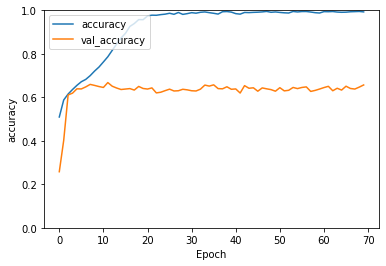

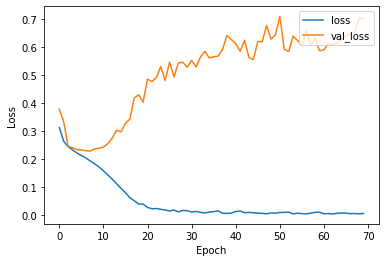

In [19]:
plot_acc_loss(history)

As we saw above, the results are not too great. Next we are going to try to add some argumentation to the data. That could help our model to leren more. You can find the file where the data has been argumendated right [here](https://github.com/BB8-2020/EmpathicRobot/tree/main/data).

## Argumet data

We split the data again

In [20]:
datagen, x_train_arg, y_train_arg, x_val_arg, y_val_arg, x_test_arg, y_test_arg = read_data('affectNet_augment', True)

Now we are going to just fit the model using this data.

In [21]:
history = fit_model(model2, 64, 100, True, datagen, x_train_arg, y_train_arg, x_val_arg, y_val_arg, x_test_arg)

Epoch 1/100
239/239 - 9s - loss: 0.2941 - accuracy: 0.5899 - val_loss: 0.2156 - val_accuracy: 0.6606
Epoch 2/100
239/239 - 8s - loss: 0.2365 - accuracy: 0.6382 - val_loss: 0.2139 - val_accuracy: 0.6825
Epoch 3/100
239/239 - 8s - loss: 0.2293 - accuracy: 0.6463 - val_loss: 0.2006 - val_accuracy: 0.6872
Epoch 4/100
239/239 - 8s - loss: 0.2220 - accuracy: 0.6570 - val_loss: 0.1996 - val_accuracy: 0.6930
Epoch 5/100
239/239 - 8s - loss: 0.2181 - accuracy: 0.6628 - val_loss: 0.1965 - val_accuracy: 0.6956
Epoch 6/100
239/239 - 8s - loss: 0.2156 - accuracy: 0.6660 - val_loss: 0.1941 - val_accuracy: 0.6945
Epoch 7/100
239/239 - 8s - loss: 0.2112 - accuracy: 0.6734 - val_loss: 0.1955 - val_accuracy: 0.7044
Epoch 8/100
239/239 - 8s - loss: 0.2070 - accuracy: 0.6846 - val_loss: 0.1908 - val_accuracy: 0.7044
Epoch 9/100
239/239 - 8s - loss: 0.2059 - accuracy: 0.6830 - val_loss: 0.1905 - val_accuracy: 0.7112
Epoch 10/100
239/239 - 8s - loss: 0.2046 - accuracy: 0.6865 - val_loss: 0.1943 - val_accura

Epoch 82/100
239/239 - 8s - loss: 0.1178 - accuracy: 0.8295 - val_loss: 0.2267 - val_accuracy: 0.6856
Epoch 83/100
239/239 - 8s - loss: 0.1182 - accuracy: 0.8275 - val_loss: 0.2205 - val_accuracy: 0.7107
Epoch 84/100
239/239 - 8s - loss: 0.1186 - accuracy: 0.8258 - val_loss: 0.2308 - val_accuracy: 0.6888
Epoch 85/100
239/239 - 8s - loss: 0.1152 - accuracy: 0.8318 - val_loss: 0.2294 - val_accuracy: 0.7102
Epoch 86/100
239/239 - 8s - loss: 0.1146 - accuracy: 0.8334 - val_loss: 0.2323 - val_accuracy: 0.6997
Epoch 87/100
239/239 - 8s - loss: 0.1155 - accuracy: 0.8313 - val_loss: 0.2373 - val_accuracy: 0.7123
Epoch 88/100
239/239 - 8s - loss: 0.1151 - accuracy: 0.8324 - val_loss: 0.2340 - val_accuracy: 0.7044
Epoch 89/100
239/239 - 8s - loss: 0.1138 - accuracy: 0.8322 - val_loss: 0.2314 - val_accuracy: 0.7170
Epoch 90/100
239/239 - 8s - loss: 0.1123 - accuracy: 0.8351 - val_loss: 0.2321 - val_accuracy: 0.7091
Epoch 91/100
239/239 - 8s - loss: 0.1105 - accuracy: 0.8359 - val_loss: 0.2176 - v

Now we're going to test our model using the test set for the model.

In [22]:
test_loss, test_acc = evaluate_model(model2, x_test_arg, y_test_arg, 64)

30/30 [==============================] - 0s 9ms/step - loss: 0.2481 - accuracy: 0.7070


In [23]:
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

Test loss: 0.2481
Test accuracy: 0.7070


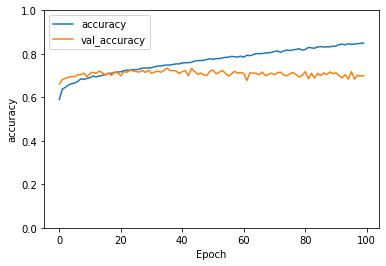

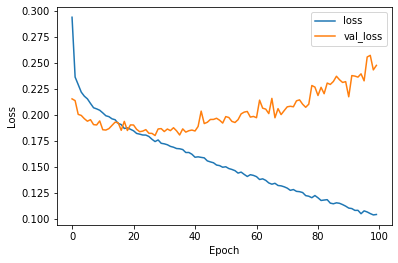

In [24]:
plot_acc_loss(history)

The model is still overfit :(

In [25]:
save_model_to_lite(model2, test_acc)

INFO:tensorflow:Assets written to: C:\Users\storm\AppData\Local\Temp\tmprv6qaiwi\assets


In [26]:
save_all_model(model2, test_acc)

INFO:tensorflow:Assets written to: saved_all_model7070\assets


INFO:tensorflow:Assets written to: saved_all_model7070\assets


Model is saved in a file.


## Conclusion


The edited data helped the model a bit to get better results. Unfortunately, the results are still not too good. This model will not be used for our final presentation.

this data set is therefore not entirely suitable for this model. [Here](https://github.com/BB8-2020/EmpathicRobot/tree/main/models/classification_model/vgg16) we are going to try to use the data in vgg16 model.